
## Introduction 

The purpose of this notebook is to provide an introduction to Image Processing. It is designed to help a user build intuition when working with image data. This is by no means a comprehensive guide to the vast and fascinating field of Image Processing. This is meant to be a quick tutorial for anyone looking to get started with manipulating and analyzing images using computational methods.

To get started, we will need: 
- OpenCV: https://opencv.org
- NumPy: https://numpy.org
- MatPlotLib: https://matplotlib.org


In [55]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [80]:
class ImageProcessing:

        
    def blur(self, image):
        
        kernel = np.ones((50,50),np.float32)/50**2
        blur_image = cv.filter2D(image,-1,kernel)
        
        return blur_image

    
    def black_and_white(self, image):
        
        image_bw = 0.114*image[:,:,0] + 0.587*image[:,:,1] + 0.299*image[:,:,2]
        
        return image_bw
    
    
    def blue_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,0] = image[:,:,0]
        
        return blue_image
    
    
    def green_image(self, image):
        
        green_image = np.zeros(image.shape)
        green_image[:,:,1] = image[:,:,1]
        
        return green_image
    
    
    def red_image(self, image):
        
        red_image = np.zeros(image.shape)
        red_image[:,:,2] = image[:,:,2]
        
        return red_image
    
    
    def edges(self, image):
        
        sobelx = np.abs(cv.Sobel(image,cv.CV_64F,1,0,ksize=25))
        sobely = np.abs(cv.Sobel(image,cv.CV_64F,0,1,ksize=25))
        energy = np.sqrt(sobelx**2 + sobely**2).sum(axis=2)
    
        edges_image = energy*255.0/np.max(energy)
        
        return edges_image
    
        
    def sketch(self, image):
        
        bw = processimage.black_and_white(image)
        inverted = np.ones(bw.shape)*255 - bw
        kernel = np.ones((35,35),np.float32)/35**2
        blur_inv= cv.filter2D(inverted,-1,kernel)

        bw -= .01 #fix divide by zero issue 
        result = blur_inv *255/(255-bw)  
        result[result>255]=255 
        result[bw==255]=255 
        
        return result
    
    
    def oilpaint(self,image):
        
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25,25))
        morph = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
        
        oilpaint = cv.normalize(morph,None,35,255,cv.NORM_MINMAX)
        
        return oilpaint
    
    

## Importing and Plotting Images

We can read in a local image file by using the **imread** function in OpenCV. To demonstrate the following image processing methods, I will be using a photo I took during my visit to Bosnia and Herzegovina.

To visualize the image within Jupyter Notebook, we can utilize MatPlotLib, which will plot the image data as a collection of data points. Since MatPlotLib expects a RGB input, and OpenCV provides a BGR output, we need to convert the image to RGB to view the image as expected. You can try plotting image directly rather than RGB_image to see the difference without the conversion.

In [57]:
image = cv.imread("bosnia.jpg")

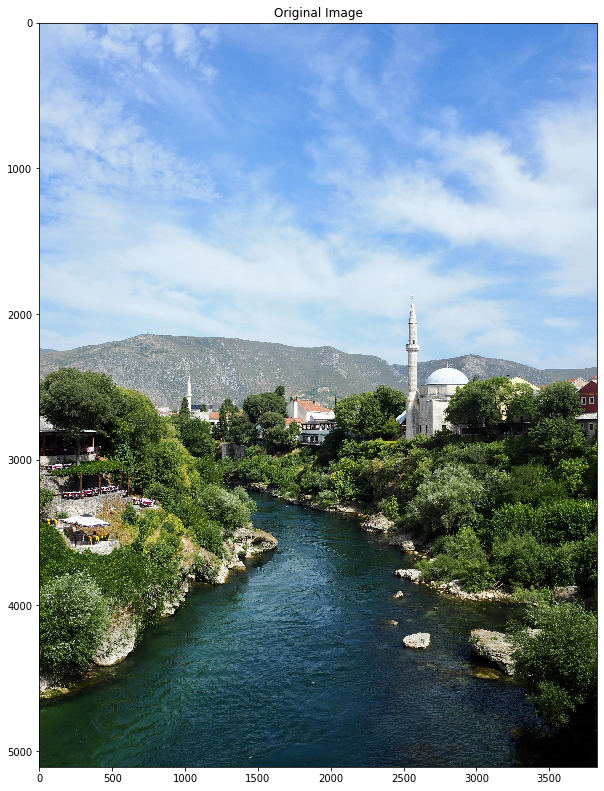

In [58]:
RGB_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize = (10,15))
plt.imshow(RGB_image)
plt.title('Original Image')
plt.show()

## Images as NumPy Arrays

Before diving into how to process images, it's important to understand what images actually are. You may be wondering why we are using NumPy here, and it is because an image is simply a set of pixels represented as a three dimensional NumPy array. 

We can observe the the dimensions of an image by calling the shape. All images are formatted with the following dimensions: 
(height, width, depth). In the example below, we have a height of 5109 pixels and a width of 3831 pixels. The depth value 3 represents the three color channels of our image: blue, green and red. 

In [59]:
image.shape

(5109, 3831, 3)

Each pixel represents an intensity value, which ranges from 0 to 255. A pixel value of 0 is visually represented by the color black, while 255 can be observed as the color white. 

In [60]:
image[0][0][0]

237

## Image Processing

Now that we have a basic understanding of images, we can get started with some simple image processing. For the following demonstrations, I will be using functions within the Image Processing Class. Please refer to the Class above to see the specific code. 

In [81]:
processimage = ImageProcessing()

## Blurring an Image

The process of blurring an image is simple. We take the average pixel value of a certain neighborhood of pixels, and replace that neighborhood's pixels with the mean. You can do this from scratch, using for loops, but luckily we can use OpenCV's built in filter2D function along with a kernel, which specifies the size of the neighborhood we are considering. Since we are working with a rather large image here, I chose the kernel size to be 50 x 50, however, this can be adjusted in the function above to be more suitable for smaller images. 

You might be wondering what the purpose of blurring an image may be. Blurring an image helps reduce noise, and is often used in edge detection, which is important in Computer Vision. Other common methods of blurring include Gaussian Blurring and Median Blurring. 

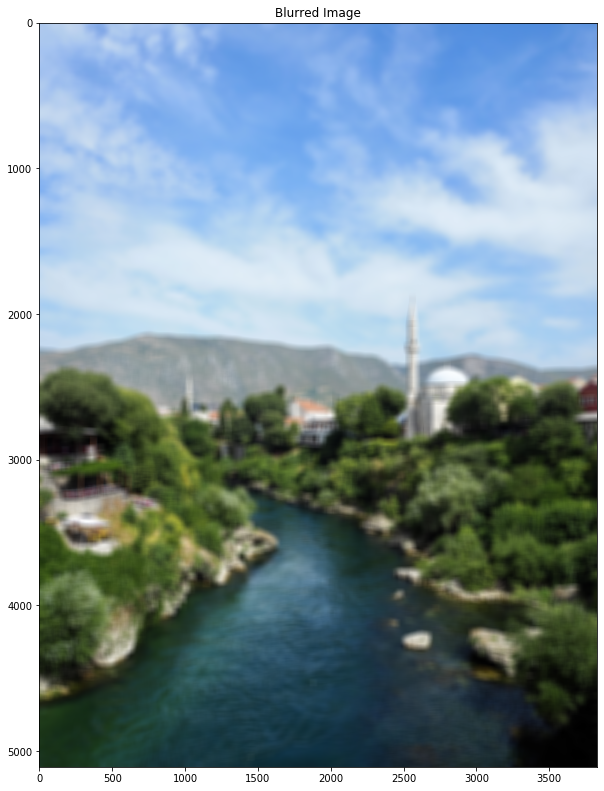

In [62]:
blur = processimage.blur(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Blurred Image')
plt.show()

## Black and White

As mentioned previously, each image has three channels. In order to create a black and white image, we simply compress the three color channels into a single two dimensional array (height x width x depth = 1). 

Each pixel is allowed to have a value from 0 to 255. Since an image cannot have a pixel value that exceeds this range, we need to properly weight the corresponding pixel information from each channel. We use the following mathematical formula to produce the black and white image displayed below:

0.114 x Blue + 0.587 x Green + 0.299 x Red

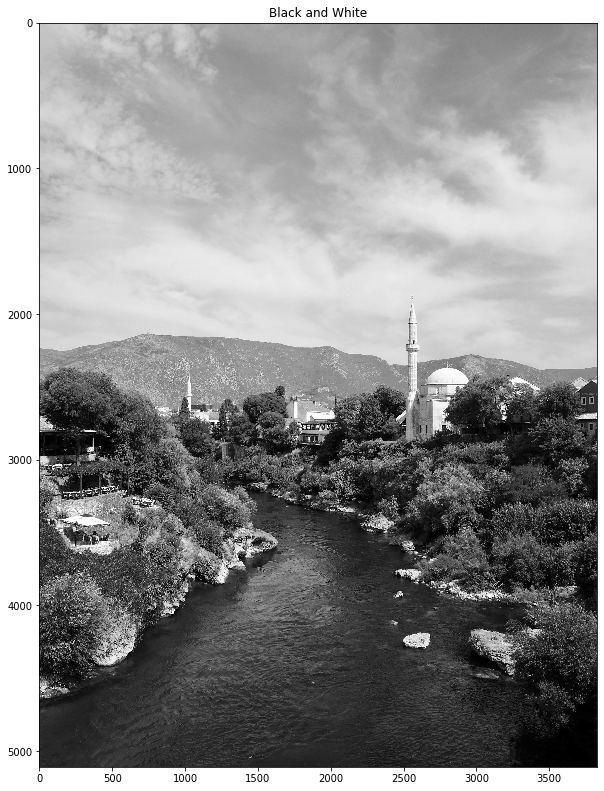

In [63]:
bw = processimage.black_and_white(image)
plt.figure(figsize = (10,15))
plt.imshow(bw, cmap="gray")
plt.title('Black and White')
plt.show()

## Isolating Color Channels

Instead of compressing a color image into a black and white output, we can also isolate each color channel within an image. All we have to do is create an equivalent array of zeroes (an all black image), and then set the blue color channel of our new array equal to that of the blue color channel from the original image. This is demonstrated in the code below:

blue_image[:,:,0] = image[:,:,0]

What this is doing is blocking out the pixel information found in the green and red channels, and there is certainly more than one way of producing a mathematically equivalent image. 

Another cool trick with NumPy is that we can stitch images together using basic matrix manipulation. Below I created an empty array that has 3 times the width of the image, and set each respective portion equal to that of the image that we want to stitch. 

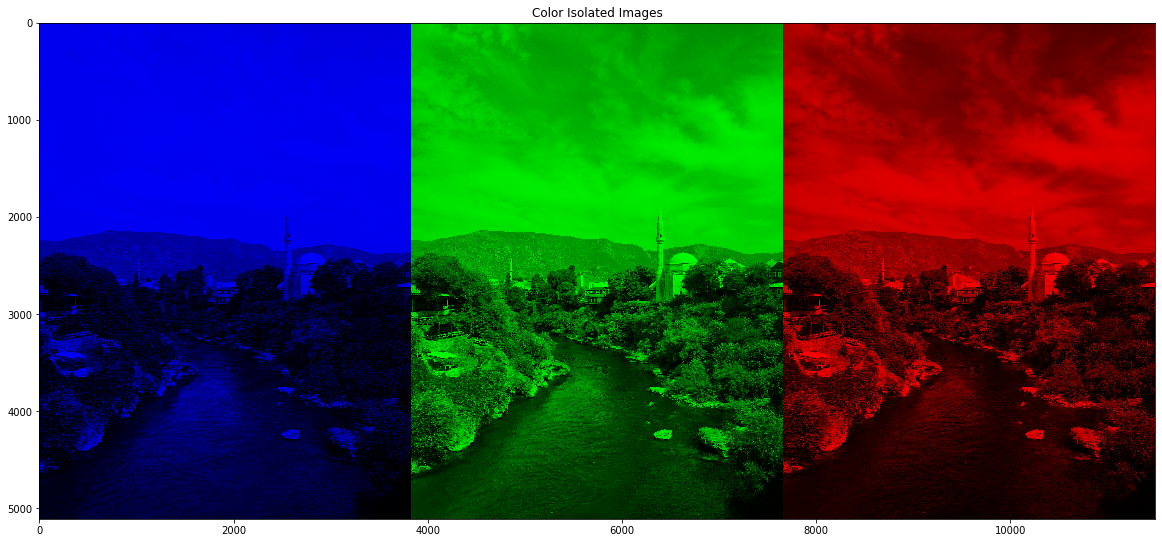

In [64]:
blue = processimage.blue_image(image)
green = processimage.green_image(image)
red = processimage.red_image(image)

combinedimage = np.zeros((5109, 3831*3, 3))
combinedimage[:,0:3831,:] = blue
combinedimage[:,3831:3831*2,:] = green
combinedimage[:,3831*2:3831*3,:] = red

cv.imwrite("combined.png",combinedimage)

blue_green_red = cv.imread("combined.png")
RGB_image = cv.cvtColor(blue_green_red, cv.COLOR_BGR2RGB)
plt.figure(figsize = (20,30))
plt.imshow(RGB_image, cmap="gray")
plt.title('Color Isolated Images')
plt.show()

## Edges of an image

One method of getting the edges of an image, is to calculate the energy of an image. The energy is the representation of localized changes within an image. Why do we see a clear outline around the mosque, but not within the river? This is because the image changes the most from the pixels within the borders of the mosque to the outer regions. In contrast there isn't a big change in the pixels within the river.

The energy can be represented mathematically as: 

energy(image) = |dx of image| + |dy of image| 

One important use of of an image's energy is seam carving, which is a content aware resizing method that resizes an image without distorting the image's contents. The energy is designed to tell us which parts of the image are more or less important. For example, if we wanted to shorten the image, we would focus on removing seams from the sky first. More on seam carving can be found in the following research paper:
https://faculty.idc.ac.il/arik/SCWeb/imret/index.html

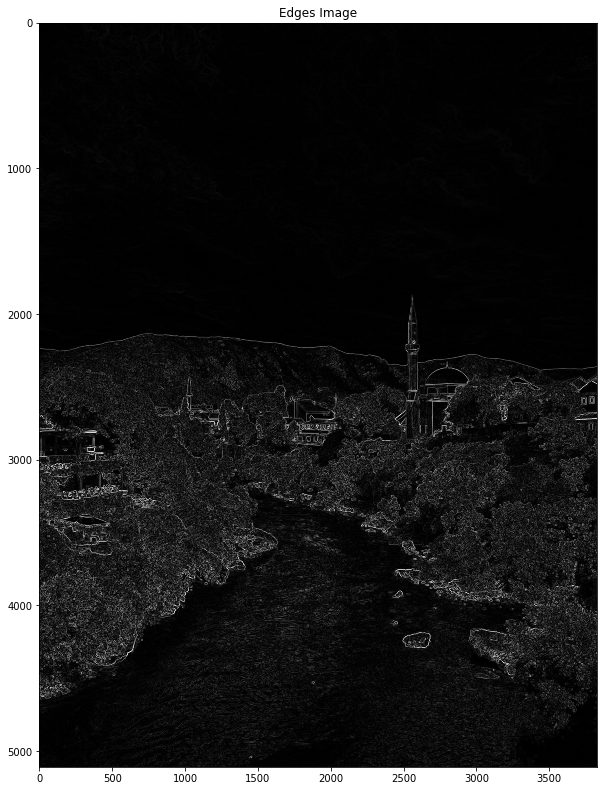

In [65]:
edges = processimage.edges(image)
plt.figure(figsize = (10,15))
plt.imshow(edges, cmap="gray")
plt.title('Edges Image')
plt.show()

## Sketch Effect

Using some of the techniques previously introduced previously, we can create an image that looks like a sketch of the original. First we need to get a black and white image, which we can do by calling our black_and_white function. 

Next we need to invert the image. Remember when I mentioned that pixels can have a value from 0 to 255? Inverting an image simply means we subtract the current pixel value from 255, for each pixel within the image. Once we have inverted the black and  white image, we need to blur the image. I used the same code within the blur image function, but changed the kernel size to be 35 x 35, since this helps the resulting image to appear a little sharper. 

Finally, we use a blending method to create a combined version of the blurred image and the black and white image in order to get the resulting sketched image.

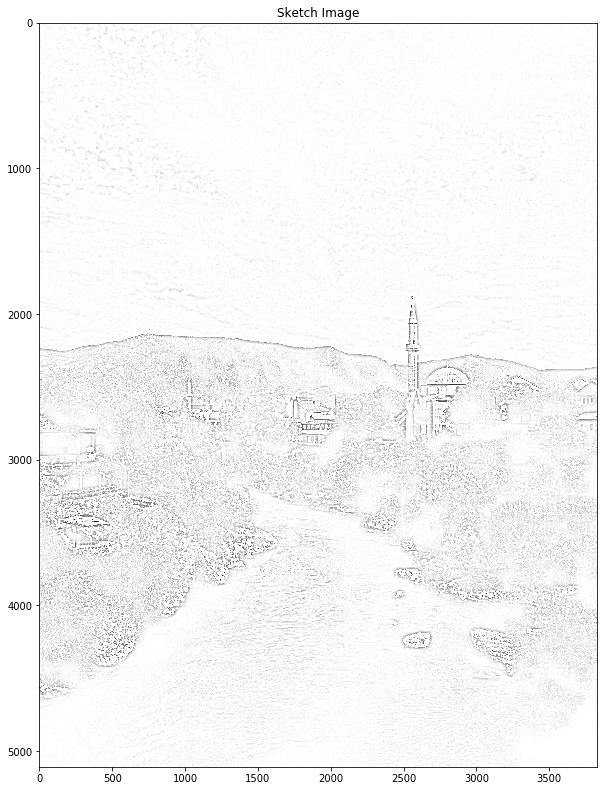

In [83]:
sketch = processimage.sketch(image)
plt.figure(figsize = (10,15))
plt.imshow(sketch, cmap="gray")
plt.title('Sketch Image')
plt.show()

## Oil Painting 

We can also give our image an oil painting effect. To do this we apply morphology to the image. More on morphological transformations and how to use them can be found on OpenCV's documentation. 

Because applying morphology darkens some areas of the image, we need to normalize the image. As mentioned previously, pixels can have a value from 0 to 255. By applying normalization, the new range of pixel values gets adjusted to fall within the range of 35 to 255 (or as specified). This means all the pixels in the image get lightened. This produces a much brighter looking oil painting. 

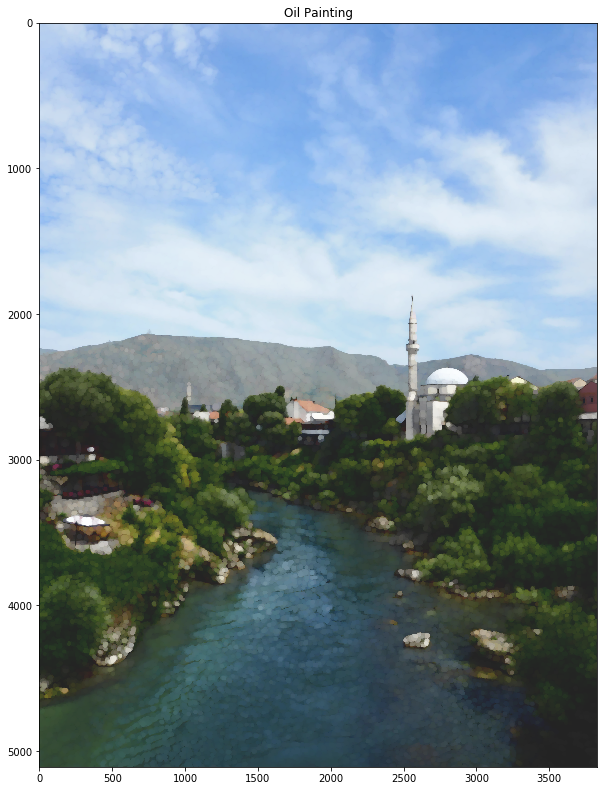

In [82]:
blur = processimage.oilpaint(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Oil Painting')
plt.show()